# **PROGRAM VERIFIKASI TANDA TANGAN (CNN)**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from google.colab import drive
from google.colab import files
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import io
import IPython.display as display


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path ke dataset
train_dir = '/content/drive/My Drive/Kaggle/Dataset_Signature_Final'
validation_split = 0.2


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Definisi ImageDataGenerator untuk train dan validation
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split=validation_split)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='training'
)

validation_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation'
)


Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
# Hitung total dan validation samples setelah mendefinisikan generator
total_samples = len(train_generator)
validation_samples = int(total_samples * validation_split)


In [ ]:
# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Kompilasi model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Pelatihan model
model.fit(train_generator, epochs=10)


Epoch 1/10
12/12 [==============================] - 17s 1s/step - loss: 0.4680 - accuracy: 0.7750
Epoch 2/10
12/12 [==============================] - 16s 1s/step - loss: 0.3986 - accuracy: 0.7917
Epoch 3/10
12/12 [==============================] - 16s 1s/step - loss: 0.3259 - accuracy: 0.8583
Epoch 4/10
12/12 [==============================] - 15s 1s/step - loss: 0.2347 - accuracy: 0.8875
Epoch 5/10
12/12 [==============================] - 15s 1s/step - loss: 0.2261 - accuracy: 0.9208
Epoch 6/10
12/12 [==============================] - 16s 1s/step - loss: 0.1672 - accuracy: 0.9458
Epoch 7/10
12/12 [==============================] - 19s 2s/step - loss: 0.0889 - accuracy: 0.9792
Epoch 8/10
12/12 [==============================] - 25s 2s/step - loss: 0.1078 - accuracy: 0.9583
Epoch 9/10
12/12 [==============================] - 15s 1s/step - loss: 0.0573 - accuracy: 0.9875
Epoch 10/10
12/12 [==============================] - 16s 1s/step - loss: 0.0182 - accuracy: 1.0000


In [ ]:
# Fungsi untuk memverifikasi gambar tanda tangan
def verify_signature(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.

    prediction = model.predict(img)
    if prediction[0][0] >= 0.5:
        return "Tanda tangan asli"
    else:
        return "Tanda tangan palsu"

Saving ttd.png to ttd (1).png
File yang diunggah: "ttd (1).png" dengan ukuran 8967 bytes


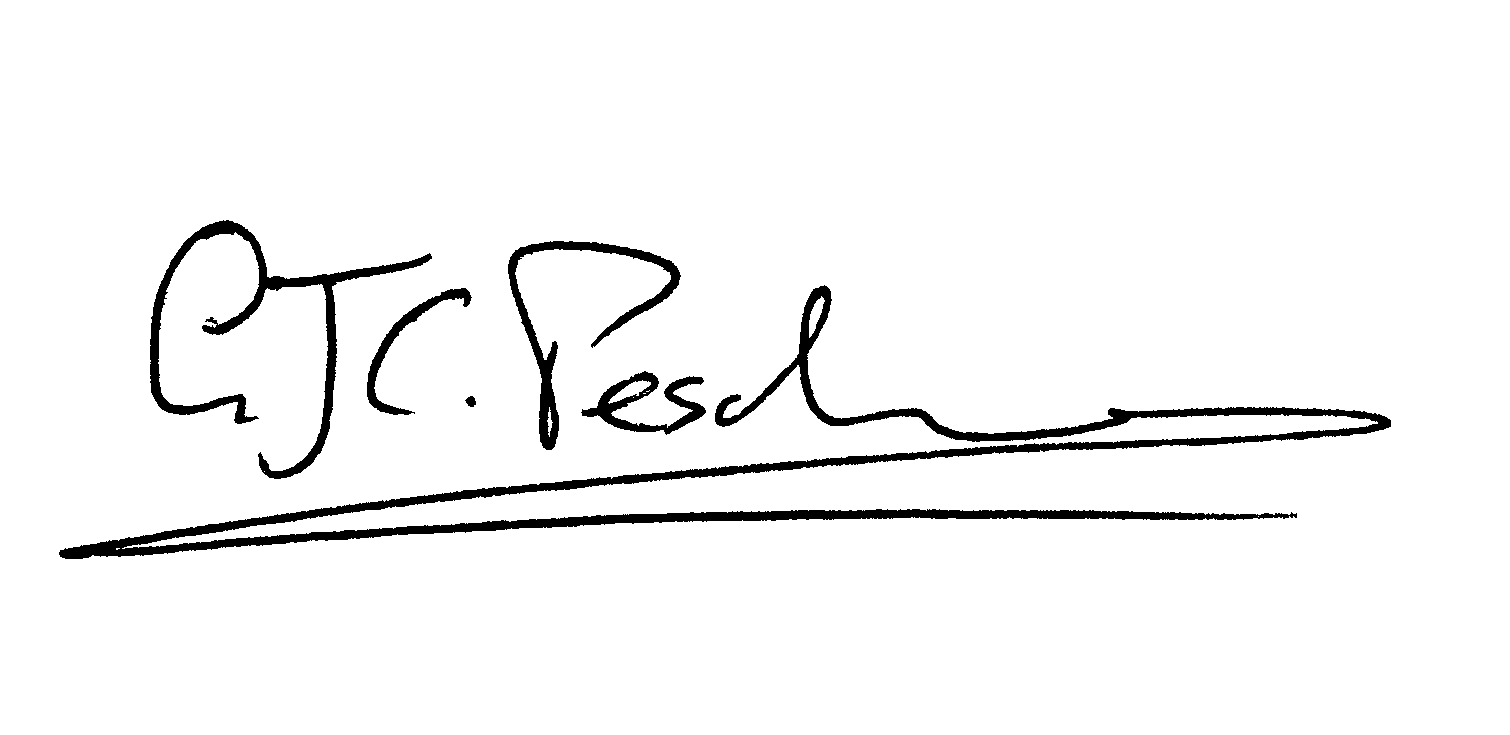

1/1 [==============================] - 0s 107ms/step
Hasil verifikasi: Tanda tangan asli


In [ ]:
# Mengunggah gambar
uploaded = files.upload()

# Mendapatkan path dari file yang diunggah
for fn in uploaded.keys():
    uploaded_image_path = fn
    print('File yang diunggah: "{name}" dengan ukuran {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    # Tampilkan gambar yang diunggah
    display.display(display.Image(uploaded_image_path, width=300))

    # Memanggil fungsi untuk verifikasi tanda tangan
    result = verify_signature(uploaded_image_path)
    print("Hasil verifikasi:", result)


# **METRIKS PENGUJIAN**

3/3 [==============================] - 1s 290ms/step


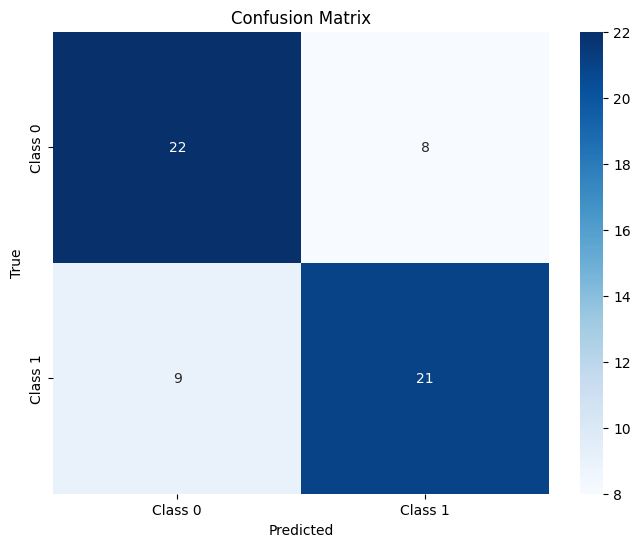


Metriks Evaluasi pada Data Validasi:
Accuracy: 0.72
Precision: 0.72
Recall: 0.70
F1-Score: 0.71
ROC AUC: 0.75


In [ ]:
# Evaluasi model menggunakan data validasi
model.evaluate(validation_generator)

# Memprediksi data validasi
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_binary = np.round(y_pred)

# Menghitung metriks evaluasi
accuracy = accuracy_score(y_true, y_pred_binary)
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)
roc_auc = roc_auc_score(y_true, y_pred)

# Membuat matriks pengujian
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Menampilkan matriks pengujian sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan metriks evaluasi dengan 2 digit di belakang koma
print("\nMetriks Evaluasi pada Data Validasi:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
